accuracy_score 0.9987573137265054
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10197
           1       1.00      1.00      1.00      9116

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313

confusion_matrix [[10181    16]
 [    8  9108]]
customer churn prediction
enter customer id2
customer will stay


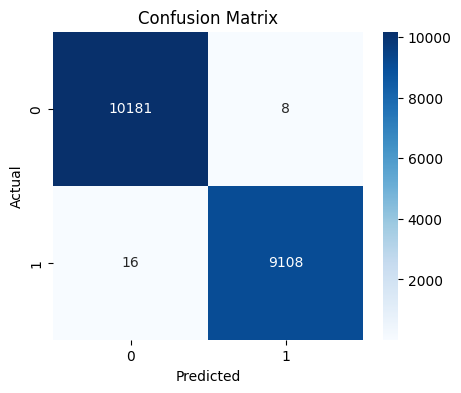

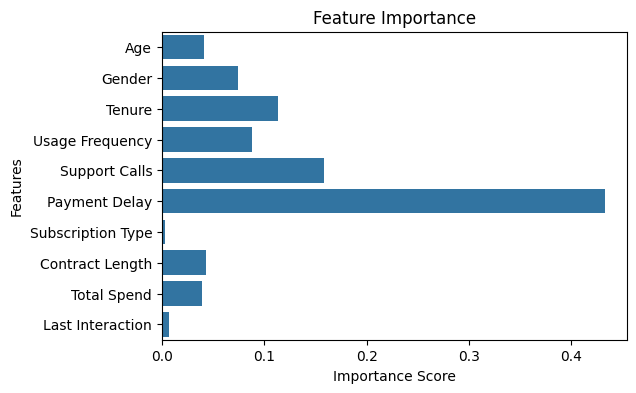

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
df=pd.read_csv("customer_churn_dataset.csv")

label_encoder=LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df["Subscription Type"]=label_encoder.fit_transform(df["Subscription Type"])
df["Contract Length"]=label_encoder.fit_transform(df["Contract Length"])
x=df.drop(["Churn","CustomerID"], axis=1)
y=df["Churn"]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=0.3)
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("accuracy_score",accuracy_score(y_pred,y_test))
print("classification_report",classification_report(y_pred,y_test))
print("confusion_matrix",confusion_matrix(y_pred,y_test))
#take input
print("customer churn prediction")
CustomerID=int(input("enter customer id"))
  #find customer row
customer_data=df[df["CustomerID"]==CustomerID]

if customer_data.empty:
  print("customer id not found")
else:
    customer_feature=customer_data.drop(["Churn","CustomerID"],axis=1)
    prediction=model.predict(customer_feature)
    if prediction[0] == 1 :
      print("customer will leave")
    else :
      print("customer will stay")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Visualization
importances = model.feature_importances_
feature_names = x.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()